<div style="background-color: #f0f8ff; padding: 15px; border-radius: 10px;">
    <h1 style="color: #1e90ff; text-align: center;">🌍 Exploratory Data Analysis: Global Student Migration (2019–2023)</h1>
    <p style="color: #333; font-size: 16px;">
        This notebook performs an end-to-end EDA on the <a href="https://www.kaggle.com/datasets/atharvasoundankar/global-student-migration-and-higher-education-trends">Global Student Migration & Higher Education Trends</a> dataset. 
        We’ll explore student migration patterns, clean the data, visualize trends, and derive insights about global higher education mobility. Let’s embark on this data journey! 🚀
    </p>
</div>



<h2 style="color: #1e90ff; text-align: left;">AIM</h2>
<p style="color: #333; font-size: 15px;">
To analyze global student migration trends from 2019 to 2023 using Python, uncovering patterns in destination choices, academic preferences, scholarships, visa dynamics, and career outcomes. The goal is to generate actionable insights for universities, policymakers, and students.</p>



<h2 style="color: #1e90ff; text-align: left;">OBJECTIVES</h2>
<p style="color: #333; font-size: 15px;">*	Identify top destination countries and universities for international students.</P>
<p style="color: #333; font-size: 15px;">*	Discover high-demand fields and courses across regions.</p>
<p style="color: #333; font-size: 15px;">*	Examine the impact of scholarships and visa policies on student mobility.</p>
<p style="color: #333; font-size: 15px;">*	Evaluate placement success rates and salary outcomes post-graduation.</p>
<p style="color: #333; font-size: 15px;">*	Understand migration patterns and shifts due to global events (e.g., COVID-19).</p>


 <h2 style="color: #1e90ff; text-align: left;">PROJECT OVERVIEW</h2>
<p style="color: #333; font-size: 15px;"> This project presents a detailed analysis of international student migration patterns for higher education between 2019 and 2023, using a rich dataset that captures:</p>
<p style="color: #333; font-size: 15px;">•	 Country of origin and destination </p>
<p style="color: #333; font-size: 15px;">•	 University and city mappings </p>
<p style="color: #333; font-size: 15px;">•	 Course and discipline details  </p>
<p style="color: #333; font-size: 15px;">•	 Scholarship and visa status </p>
<p style="color: #333; font-size: 15px;">•	 Placement outcomes and salary data </p>
<p style="color: #333; font-size: 15px;"> The objective is to uncover trends in global education flows, funding impact, and career outcomes—providing actionable insights for universities, policymakers, and students. The analysis is conducted using Python libraries including NumPy (numerical operations), Pandas (data manipulation), and Matplotlib/Seaborn (visualizations).</p>


 <h2 style="color: #1e90ff; text-align: left;">DATA DESCRIPTION</h2>
This dataset captures detailed records of international student migration for higher education between 2019 and 2023. It includes over five years of student-level data across 10 major destination countries, reflecting real-world trends in academic mobility, program choices, and career outcomes.
  <h3 style="color: #1e90ff; text-align: left;" >KEY FEATURES</h3>
<table>
<thead>
<tr><th style="color: #1e90ff;">Category</th><th style="color: #1e90ff;">Description</th></tr>
</thead>
<tbody style="color: #333; font-size: 15px;">
<tr><td> Origin & Destination</td><td>Country of origin, destination country, university, and city</td></tr>
<tr><td>  Academic Info</td><td>Field of study, course level (UG/PG), intake season (Fall/Spring)</td></tr>
 <tr><td> Scholarships</td><td>Scholarship flag (yes/no), amount awarded, tuition cost</td></tr>
 <tr><td> Visa Details</td><td>Visa approval status, processing time, refusal reasons (if available)</td></tr>
 <tr><td> Student Profile</td><td>Gender, socio-economic proxy (if available), cohort year</td></tr>
<tr><td>  Placement Outcomes</td><td>Placement status (within 6/12 months), internship conversion, salary</td></tr>
 <tr><td> Salary Data</td><td>Starting salary (local currency and PPP-adjusted), salary-to-tuition ratio</td></tr>
</tbody>
</table>
<h3 style="color: #1e90ff; text-align: left;">DATA FORMAT</h3>
<p style="color: #333; font-size: 15px;">•	Rows: Each row represents an individual student record</p>
<p style="color: #333; font-size: 15px;">•	Columns: Variables include origin, destination, university, course, scholarship, visa, placement, salary, and demographics</p>
<p style="color: #333; font-size: 15px;">•	Time Dimension: Year of intake (2019–2023), allowing for time-series analysis and cohort comparisons </p>



<div style="background-color: #e6ffe6; padding: 15px; border-radius: 10px;">
    <h2 style="color: #2e8b57;">📂 Step 1: Loading the Dataset</h2>
    <p style="color: #333; font-size: 16px;">
        We load the CSV file into a pandas DataFrame to inspect its structure. Ensure the dataset is downloaded from Kaggle and placed in your working directory. The dataset’s structure, including row count, column types, and summary statistics. This helps identify missing values, data types, and potential cleaning needs.
    </p>
</div>



<h3 style="color: #2e8b57;"> Import Necessary Libraries</h3>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import difflib
import re

<h3 style="color: #2e8b57;">Load the dataset</h3>

In [4]:
df=pd.read_csv(r"D:\DATA ANALYTIS COURSE\New folder\capstone projects\global_student_migration__.csv")

<h3 style="color: #2e8b57;"> Get a summary of the dataset structure</h3>

In [5]:
print("\n🔹 Dataset Info:")
print(df.info())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076 entries, 0 to 5075
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 5041 non-null   object 
 1   origin_country             5058 non-null   object 
 2   destination_country        5056 non-null   object 
 3   university_name            5057 non-null   object 
 4   course_name                5055 non-null   object 
 5   field_of_study             5053 non-null   object 
 6   year_of_enrollment         5055 non-null   float64
 7   scholarship_received       5053 non-null   object 
 8   enrollment_reason          5053 non-null   object 
 9   graduation_year            5056 non-null   float64
 10  placement_status           5059 non-null   object 
 11  placement_country          2537 non-null   object 
 12  placement_company          2547 non-null   object 
 13  starting_salary_usd        5061

<h3 style="color: #2e8b57;"> Get basic statistics for numerical columns</h3>

In [6]:
print("\n🔹 Descriptive Statistics:")
df.describe().transpose()


🔹 Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
year_of_enrollment,5055.0,2021.008309,1.421724,2019.0,2020.00,2021.00,2022.00,2023.0
graduation_year,5056.0,2023.016812,1.650080,2020.0,2022.00,2023.00,2024.00,2026.0
starting_salary_usd,5061.0,44652.012053,50752.612730,0.0,0.00,30975.00,88090.00,149932.0
gpa_or_score,5057.0,3.246838,0.430411,2.5,2.88,3.24,3.61,4.0
test_score,5057.0,5.638145,2.974566,0.0,5.30,6.50,7.80,9.0


<h3 style="color: #2e8b57;">Fetching the columns names of dataset</h3>

In [7]:
print("\n🔹 Columns:")
df.columns


🔹 Columns:


Index(['student_id', 'origin_country', 'destination_country',
       'university_name', 'course_name', 'field_of_study',
       'year_of_enrollment', 'scholarship_received', 'enrollment_reason',
       'graduation_year', 'placement_status', 'placement_country',
       'placement_company', 'starting_salary_usd', 'gpa_or_score',
       'visa_status', 'post_graduation_visa', 'language_proficiency_test',
       'test_score'],
      dtype='object')

<h3 style="color: #2e8b57;"> Lengths of the corresponding array dimensions</h3>

In [8]:
print("🔹 Length of dataset")
df.shape

🔹 Length of dataset


(5076, 19)

<h3 style="color: #2e8b57;">View the first 5 rows of the dataset</h3>

In [9]:
print("🔹 First 5 rows:")
df.head()

🔹 First 5 rows:


,student_id,origin_country,destination_country,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Lomonosov Moscow State University,Computer Science,Engineering,2021.0,No,Higher Ranking,2024.0,Placed,Russia,Microsoft,36416.0,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,UK,Germany,RWTH Aachen,Civil Engineering,Law,2023.0,Yes,Job Opportunities,2024.0,Placed,Germany,Google,32956.0,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,UAE,Heriot-Watt Durai,Design,NaN,2019.0,NaN,NaN,2021.0,Not Plaaced,NaN,NaN,0.0,3.90,Tier 4,PSW,TOEFL,7.9
3,S00004,Ireland,Canada,University of British Columbia,Law,Arts,2019.0,No,Scholarship,2020.0,Not Placed,NaN,NaN,0.0,2.72,F1,Blue Card,NaN,0.0
4,S00005,UAE,UK,University of Birmingham,Data Science,Social Sciences,2021.0,Yes,Quality of Life,2023.0,Placed,UK,Apple,50892.0,3.71,Schengen Student Visa,PSW,NaN,0.0


<h3 style="color: #2e8b57;">View the last 5 rows of the dataset</h3>

In [10]:
print("🔹 Last 5 rows:")
df.tail()

🔹 Last 5 rows:


,student_id,origin_country,destination_country,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
5071,NaN,NaN,NaN,TU Berli.,ArchiteQture,Law,2023.0,NaN,Job OOpportunities,2025.0,Not Placed,NaN,NaN,0.0,2.69,Student Visa,NaN,NaN,0.0
5072,NaN,Irelland,NaN,Ãƒâ€¦bo Akademj University,NaN,NaN,NaN,Y-s,Quality of |ife,NaN,Placedd,Fin'and,Siemens,135620.0,2.99,NaN,OZT,PTTE,6.8
5073,NaN,NaN,UAE,Manipal Academy Dubai,Medicine,NaN,2020.0,NaN,Higher Ranking,2021.0,NotPPlaced,NaN,NaN,0.0,NaN,NaN,NaN,duolingo,8.1
5074,NaN,Germany,NaN,NaN,Computer Sc!ence,Nattural Sciences,2019.0,]o,PoliticalQStability,NaN,NaN,NaN,NaN,0.0,3.36,FF1,PSW,NaN,8.4
5075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="background-color: #fff0f5; padding: 15px; border-radius: 10px;">
    <h2 style="color: #c71585;">🔍 Step 2: Data Cleaning </h2>
    <p style="color: #333; font-size: 16px;">
        We examine the dataset’s structure, including row count, column types, and summary statistics. This helps identify missing values, data types, and potential cleaning needs.
    </p>
</div>


<h3 style="color: #c71585;">Check for missing values in each column</h3>

In [11]:
print("\n🔹 Missing Values:")
df.isnull().sum()


🔹 Missing Values:


student_id                     35
origin_country                 18
destination_country            20
university_name                19
course_name                    21
field_of_study                 23
year_of_enrollment             21
scholarship_received           23
enrollment_reason              23
graduation_year                20
placement_status               17
placement_country            2539
placement_company            2529
starting_salary_usd            15
gpa_or_score                   19
visa_status                    14
post_graduation_visa           24
language_proficiency_test    1017
test_score                     19
dtype: int64

<h3 style="color: #c71585;">Drop  the Student_id column</h3>

In [12]:
if "student_id" in df.columns:
    df.drop(columns=["student_id"], inplace=True)
    print("Dropped column: Student_Id")
else:
    print("No 'Student_Id' column found.")

print("Shape after drop:", df.shape)


Dropped column: Student_Id
Shape after drop: (5076, 18)


<h3 style="color: #c71585;"> Numeric column -> fill missing with "Median"  </h3> 

In [13]:
# --- STEP: Identify numeric columns
num_cols = df.select_dtypes(include=["number"]).columns.tolist()

print("Numerical columns:", num_cols)

for col in num_cols:
    # replace 0 with NaN first
    df[col] = df[col].replace(0, np.nan)

    # compute median ignoring NaN
    median_val = df[col].median(skipna=True)

    # fill NaN (including original NaN + 0 replaced NaN)
    df[col] = df[col].fillna(median_val)

    print(f"Replaced 0/NaN/empty in '{col}' with median: {median_val}")


Numerical columns: ['year_of_enrollment', 'graduation_year', 'starting_salary_usd', 'gpa_or_score', 'test_score']
Replaced 0/NaN/empty in 'year_of_enrollment' with median: 2021.0
Replaced 0/NaN/empty in 'graduation_year' with median: 2023.0
Replaced 0/NaN/empty in 'starting_salary_usd' with median: 87806.0
Replaced 0/NaN/empty in 'gpa_or_score' with median: 3.24
Replaced 0/NaN/empty in 'test_score' with median: 7.0


<h3 style="color: #c71585;"> Convert Year columns to integer </h3>

In [14]:
df['year_of_enrollment'] = df['year_of_enrollment'].astype('Int64')
df['graduation_year'] = df['graduation_year'].astype('Int64')

# Check results
print(df[['year_of_enrollment', 'graduation_year']].head())

   year_of_enrollment  graduation_year
0                2021             2024
1                2023             2024
2                2019             2021
3                2019             2020
4                2021             2023


<h3 style="color: #c71585;">Round off to whole number</h3>

In [15]:
df['gpa_or_score'] = df['gpa_or_score'].round(0).astype('Int64')
df['starting_salary_usd'] = df['starting_salary_usd'].round(0).astype('Int64')
df['test_score'] = df['test_score'].round(0).astype('Int64')
#  Check results
print(df[['starting_salary_usd','gpa_or_score','test_score']].head())

   starting_salary_usd  gpa_or_score  test_score
0                36416             4           8
1                32956             3           8
2                87806             4           8
3                87806             3           7
4                50892             4           7


<h3 style="color: #c71585;"> Text column -> fill missing with "mode" </h3> 

In [16]:
# Get all object (string) columns
obj_col = df.select_dtypes(include="object").columns

for col in obj_col:
    if df[col].dropna().empty:
        print(f"Skipping '{col}' — empty after cleaning.")
        continue
    try:
        mode_val = df[col].mode(dropna=True)
    except Exception:
        mode_val = []
    if len(mode_val) > 0:
        df.fillna({col:mode_val[0]}, inplace=True)
        print(f"Filled NaNs in '{col}' with mode = {mode_val[0]}")
    else:
        print(f"No mode for '{col}', left as is.")


Filled NaNs in 'origin_country' with mode = Russia
Filled NaNs in 'destination_country' with mode = UAE
Filled NaNs in 'university_name' with mode = University of Stuttgart
Filled NaNs in 'course_name' with mode = Data Science
Filled NaNs in 'field_of_study' with mode = Social Sciences
Filled NaNs in 'scholarship_received' with mode = Yes
Filled NaNs in 'enrollment_reason' with mode = Quality of Life
Filled NaNs in 'placement_status' with mode = Placed
Filled NaNs in 'placement_country' with mode = UK
Filled NaNs in 'placement_company' with mode = Microsoft
Filled NaNs in 'visa_status' with mode = Schengen Student Visa
Filled NaNs in 'post_graduation_visa' with mode = Blue Card
Filled NaNs in 'language_proficiency_test' with mode = Duolingo


<h3 style="color: #c71585;">Replace unwanted symbols  </h3>

In [17]:
# --- STEP: Replace unwanted symbols in every column
for col in df.columns:
    if df[col].dtype == "object":  # only apply to text columns
        df[col] = df[col].astype(str).replace(r"[^A-Za-z0-9\s]", "", regex=True).str.strip()

print("Symbols removed from all text columns.")

Symbols removed from all text columns.


<h3 style="color: #c71585;">Finding unique value for spelling correction column  </h3>

In [18]:
# Loop through each column
for col in df.columns:
    print(f"\nColumn: {col}")
    
    # Unique values
    unique_vals = df[col].dropna().unique()
    print(f"Unique values ({len(unique_vals)}): {unique_vals}")


Column: origin_country
Unique values (12): ['Finland' 'UK' 'Ireland' 'UAE' 'South Africa' 'India' 'Germany' 'Russia'
 'Canada' 'USA' 'PSA' 'Irelland']

Column: destination_country
Unique values (11): ['Russia' 'Germany' 'UAE' 'Canada' 'UK' 'South Africa' 'India' 'USA'
 'Finland' 'Ireland' 'Dubliin']

Column: university_name
Unique values (115): ['Lomonosov Moscow State University' 'RWTH Aachen' 'HeriotWatt Durai'
 'University of British Columbia' 'University of Birmingham'
 'University of Stuttgart' 'University of Pretoria'
 'University of Edinburgh' 'University of Cambridge'
 'Higher School of Economics' 'IIT Bombay' 'University of Dubai'
 'JNU Delhi' 'Harvard University' 'Manipal Academy Dubai' 'UC Berkeley'
 'University of Manchester' 'Kings College London'
 'Moscow Institute of Physics and Technology' 'University of Turku'
 'Simon Fraser University' 'University of Johannesburg'
 'University of Eastern Finland' 'Tampere University'
 'National University of Ireland Galway' 'UCL' 'BI

<h3 style="color: #c71585;">Replace the spelling mistake of origin_ country column  </h3>

In [19]:
origin_corrections = {
    "PSA": "USA",        # likely typo
    "Irelland": "Ireland"
}

df["origin_country"] = df["origin_country"].replace(origin_corrections)


<h3 style="color: #c71585;">Replace the spelling mistake of destination_ country column  </h3>

In [20]:
destination_corrections = {
    "Dubliin": "Dublin"   # but if it should be "Ireland", adjust accordingly
}

df["destination_country"] = df["destination_country"].replace(destination_corrections)


<h3 style="color: #c71585;">Replace the spelling mistake of university name column  </h3>

In [21]:
typo_dict = {
    "Heidelbeerg University": "Heidelberg University",
    "bo Akademi University": "Abo Akademi University",
    "Aalyo University": "Aalto University",
    "IISc BangaHore": "IISc Bangalore",
    "Columbia Univrsity": "Columbia University",
    "Harvard Univerrsity": "Harvard University",
    "Bauman Moscow State Technical Univversity": "Bauman Moscow State Technical University",
    "UniIersity of Stuttgart": "University of Stuttgart",
    "TU Berlinn": "TU Berlin",
    "TUU Berlin": "TU Berlin",
    "TU Berli": "TU Berlin",
    "UCLLA": "UCLA",
    "UUniversity of British Columbia": "University of British Columbia",
    "Zayedd University": "Zayed University",
    "Middlesex UniversitR Dubai": "Middlesex University Dubai",
    "Manipal AcadeOy Dubai": "Manipal Academy Dubai",
    "Khalifa UnivPrsity": "Khalifa University",
    "Univeersity College Dublin": "University College Dublin",
    "Trinity College Dubein": "Trinity College Dublin",
    "Triinity College Dublin": "Trinity College Dublin",
    "Rhodes Univerrsity": "Rhodes University",
    "Rhodes Universiity": "Rhodes University",
    "Rhodes UUniversity": "Rhodes University",
    "Imerial College London": "Imperial College London",
    "Universityof the Witwatersrand": "University of the Witwatersrand",
    "Universitty of Dubai": "University of Dubai",
    "University of Helsinnki": "University of Helsinki",
    "Technical Univercity of Munich": "Technical University of Munich",
    "Technologzcal University Dublin": "Technological University Dublin",
    "bo Akademj University": "Abo Akademi University",
    "Lomonosov Moscow State Universsity": "Lomonosov Moscow State University",
    "UUniversity of Dubai": "University of Dubai"
}

df["university_name"] = df["university_name"].replace(typo_dict)


<h3 style="color: #c71585;">Replace the spelling mistake of origin_ country column  </h3>

In [22]:
# Dictionary for correcting program names
program_corrections = {
    "psychology": "Psychology",
    "Computer science": "Computer Science",
    "Computer Scence": "Computer Science",
    "ArchiteQture": "Architecture"
}
# Replace typos using dictionary
df["course_name"] = df["course_name"].replace(program_corrections)
# Normalize capitalization (title case, but keep abbreviations safe if needed)
df["course_name"] = df["course_name"].str.title()

<h3 style="color: #c71585;">Replace the spelling mistake of field_of_study column  </h3>

In [23]:
# Dictionary for subject name corrections
subject_corrections = {
    "arts": "Arts",
    "business": "Business",
    "Computer Scieence": "Computer Science",
    "Nattural Sciences": "Natural Sciences",
    "Computer science":"Computer Science"
}
# Replace using dictionary
df["field_of_study"] = df["field_of_study"].replace(subject_corrections)
# Ensure consistent capitalization (title case)
df["field_of_study"] = df["field_of_study"].str.title()

<h3 style="color: #c71585;">Replace the spelling mistake of enrollment_reason column  </h3>

In [24]:
# Dictionary for correcting typos
typo_dict = {
    "Quality of Liae": "Quality of Life",
    "Job OOpportunities": "Job Opportunities",
    "Quality of ife": "Quality of Life",
    "PoliticalQStability": "Political Stability"
}
df["enrollment_reason"] = df["enrollment_reason"].replace(typo_dict)

<h3 style="color: #c71585;">Replace the spelling mistake of scholarship_received column  </h3>

In [25]:
col = "scholarship_received"   # replace with actual column name

corrected = []
for val in df[col]:
    if pd.isna(val):
        corrected.append(None)
        continue

    text = str(val).lower()

    if any(ch in text for ch in ["y", "e", "s"]):
        corrected.append("Yes")
    elif any(ch in text for ch in ["n", "o"]):
        corrected.append("No")
    else:
        corrected.append(None)

df[col] = corrected

print(df[col].unique())


['No' 'Yes']


<h3 style="color: #c71585;">Replace the spelling mistake of placement column  </h3>

In [51]:
# Dictionary to correct spelling errors in placement_status
correction_dict = {
    'Not Plaaced': 'Not Placed',
    'Plaed': 'Placed',
    'Not PlacBd': 'Not Placed',
    'Placeed': 'Placed',
    'Not PlaIed': 'Not Placed',
    'Placld': 'Placed',
    'Pllaced': 'Placed',
    'Placedd': 'Placed',
    'Paced': 'Placed',
    'NoA Placed': 'Not Placed',
    'Place': 'Placed',
    'Not  Placed': 'Not Placed',
    'Not Placeed': 'Not Placed',
    'ilaced': 'Placed',
    'PPlaced': 'Placed',
    'POaced': 'Placed',
    'Not olaced': 'Not Placed',
    'NotPPlaced': 'Not Placed'
}

# Apply corrections to the placement_status column
df['placement_status'] = df['placement_status'].replace(correction_dict)

<h3 style="color: #c71585;">Replace the spelling mistake of placement_country column  </h3>

In [27]:
placement_country_corrections = {
    "Finand": "Finland"
}
df["placement_country"] = df["placement_country"].replace(placement_country_corrections)

<h3 style="color: #c71585;">Replace the spelling mistake of visa_status column  </h3>

In [28]:
visa_status_corrections = {
    "Tier  4": "Tier 4",   # extra space
    "FF1": "F1"            # typo
}
df["visa_status"] = df["visa_status"].replace(visa_status_corrections)

<h3 style="color: #c71585;">Replace the spelling mistake of post_graduation_visa column  </h3>

In [29]:
visa_corrections = {
    "OPPT": "OPT",
    "OZT": "OPT",
    "WWork Permit": "Work Permit",
    "PostStudy Visa": "Post Study Visa"   # unify spelling
}
df["post_graduation_visa"] = df["post_graduation_visa"].replace(visa_corrections)

<h3 style="color: #c71585;">Replace the spelling mistake of language_proficiency_test column  </h3>

In [30]:
# Dictionary for correcting typos in test names
test_corrections = {
    "pOEFL": "TOEFL",
    "hELTS": "IELTS",
    "PTTE": "PTE",
    "duolingo": "Duolingo"
}
df["language_proficiency_test"] = df["language_proficiency_test"].replace(test_corrections)

In [52]:
print(df)

     origin_country destination_country                    university_name  \
0           Finland              Russia  Lomonosov Moscow State University   
1                UK             Germany                        RWTH Aachen   
2           Ireland                 UAE                   HeriotWatt Durai   
3           Ireland              Canada     University of British Columbia   
4               UAE                  UK           University of Birmingham   
...             ...                 ...                                ...   
5071         Russia                 UAE                          TU Berlin   
5072        Ireland                 UAE             Abo Akademi University   
5073         Russia                 UAE              Manipal Academy Dubai   
5074        Germany                 UAE            University of Stuttgart   
5075         Russia                 UAE            University of Stuttgart   

            course_name    field_of_study  year_of_enrollment  

 <h3 style="color: #c71585;"> Statistical summary of numeric columns</h3>

In [32]:

df.describe()


,year_of_enrollment,graduation_year,starting_salary_usd,gpa_or_score,test_score
count,5076.0,5076.0,5076.0,5076.0,5076.0
mean,2021.008274,2023.016745,88301.973798,3.324468,7.006698
std,1.41878,1.646826,24552.261617,0.471159,1.084396
min,2019.0,2020.0,30276.0,2.0,5.0
25%,2020.0,2022.0,87739.75,3.0,6.0
50%,2021.0,2023.0,87806.0,3.0,7.0
75%,2022.0,2024.0,87854.25,4.0,8.0
max,2023.0,2026.0,149932.0,4.0,9.0


<div style="background-color: #e0ffff; padding: 15px; border-radius: 10px;">
    <h2 style="color: #008b8b;">📈 Step 3: Univariate Analysis</h2>
    <p style="color: #333; font-size: 16px;">
        We analyze individual variables (e.g., student count , courses and years) to understand their distributions. Count plots reveal patterns and course trends. The piechart reveals  the trends in the year  of enrollment 
    </p>
</div>


 <h2 style="color: #008b8b;"> Distribution of course</h2>

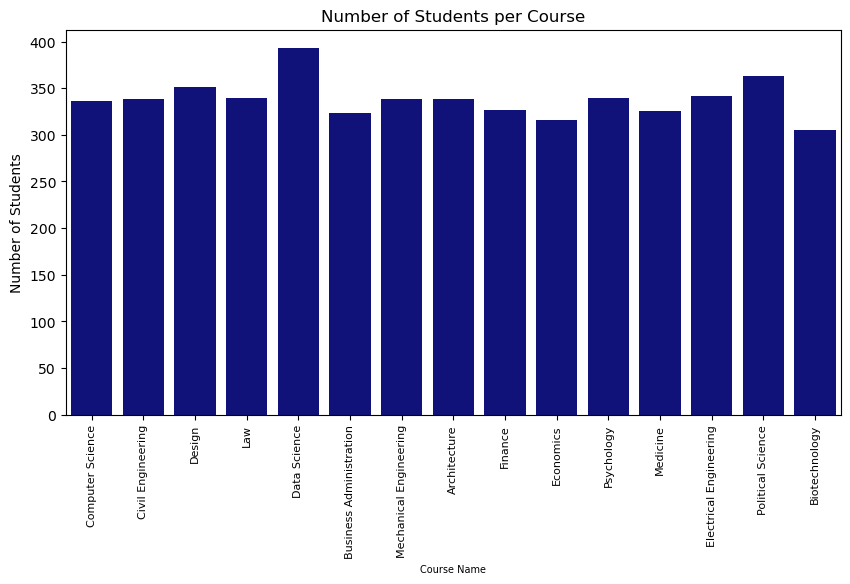

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x='course_name', data=df, color='darkblue')
plt.title("Number of Students per Course")
plt.xticks(rotation=90,fontsize=8)
plt.xlabel("Course Name", fontsize=7)
plt.ylabel("Number of Students", fontsize=10)
plt.show()


# 📊 Chart Interpretation: "Number of Students per Course"

## 🔝 Highest Enrollment
- **Data Science** leads with the most students.
- **Law** and **Political Science** follow closely behind.

## ⚖️ Moderate Enrollment
- **Computer Science**
- **Business Administration**
- **Psychology**
- **Economics**

These courses show solid but not peak numbers.

## 🔽 Lowest Enrollment
- **Biotechnology** has the fewest students.
- **Architecture** and **Design** also have relatively low counts.


 <h2 style="color: #008b8b;"> Count students per year </h2>

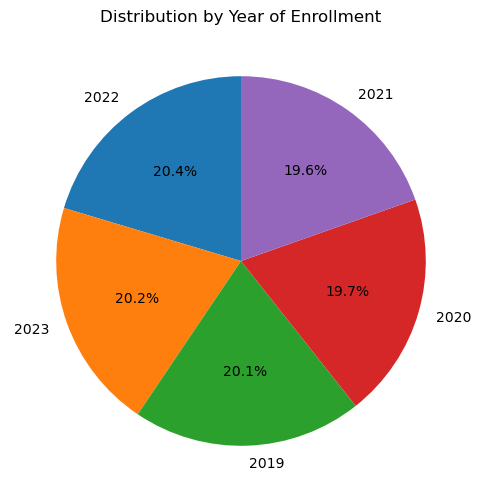

In [34]:
year_counts = df['year_of_enrollment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution by Year of Enrollment")
plt.show()


# 🥧 Chart Interpretation: "Distribution by Year of Enrollment"

This pie chart illustrates the proportion of students enrolled each year from **2019 to 2023**. The distribution is fairly balanced, indicating consistent enrollment trends over time.

## 📅 Year-wise Breakdown
- **2022**: 20.4% – Highest enrollment year.
- **2023**: 20.2%
- **2019**: 20.1%
- **2020**: 19.7%
- **2021**: 19.6% – Lowest enrollment year.

## 🔍 Insights
- The enrollment percentages across all five years are within a narrow range (~19.6% to 20.4%), suggesting stable intake.
- No significant spikes or drops, which may reflect consistent admission policies or demand.

This visualization helps in understanding temporal patterns and planning for future capacity or resource allocation.


<div style="background-color: #ffe4e1; padding: 15px; border-radius: 10px;">
    <h2 style="color: #ff4500;">🔗 Step 4: Bivariate Analysis</h2>
    <p style="color: #333; font-size: 16px;">
        We explore relationships, such as student migration by country and yearusing line plot, Students by test scores, Average starting salary by course
    </p>
</div>


<h2 style="color: #ff4500;"> Scholarship  analysis of each  Origin_country</h2>

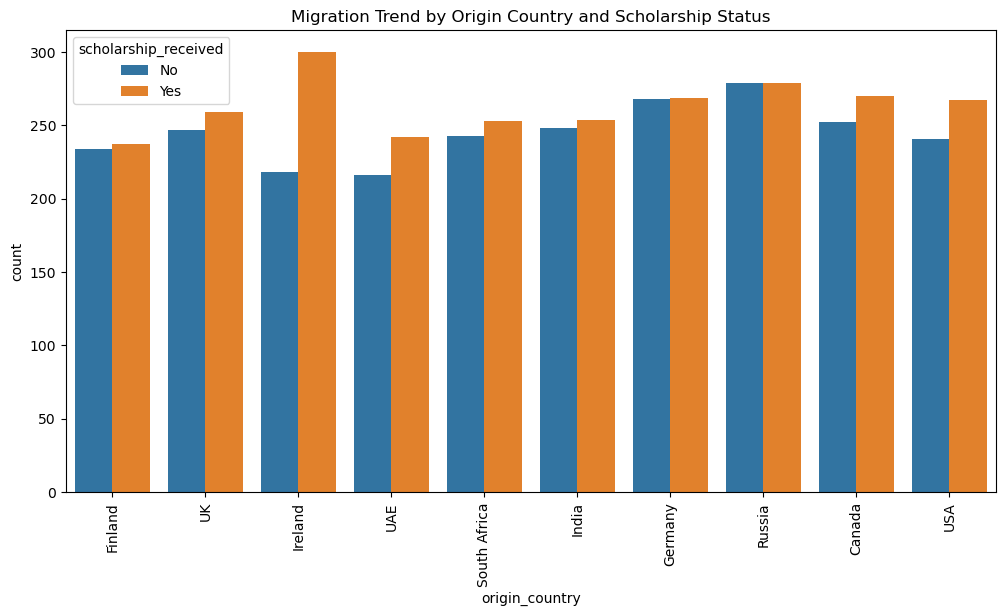

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(x="origin_country", hue="scholarship_received", data=df)
plt.title("Migration Trend by Origin Country and Scholarship Status")
plt.xticks(rotation=90)
plt.show()


# 🌍 Migration Trend by Origin Country and Scholarship Status

This chart visualizes the number of migrants from various origin countries, split by whether they received a scholarship.

## 🟦 No Scholarship vs 🟧 Scholarship

### 🇮🇳 India
- High number of migrants.
- Majority **did not** receive scholarships.

### 🇺🇸 USA & 🇨🇦 Canada
- Significant migration counts.
- Scholarships are more evenly distributed.

### 🇬🇧 UK & 🇮🇪 Ireland
- Moderate migration.
- Slightly more migrants **without** scholarships.

### 🇫🇮 Finland & 🇩🇪 Germany
- Lower migration numbers.
- Scholarships are relatively common among migrants.

### 🇷🇺 Russia & 🇿🇦 South Africa
- Fewer migrants overall.
- Scholarship distribution varies.

### 🇦🇪 UAE
- Migration numbers are modest.
- Most migrants **did not** receive scholarships.

## 🔍 Insights
- Countries like **India** and **USA** show strong migration trends, but with differing scholarship support.
- **Germany** and **Finland** stand out for higher scholarship ratios despite lower migration volume.



<h2 style="color: #ff4500;"> Student Scores Analysis of Language Proficiency</h2>

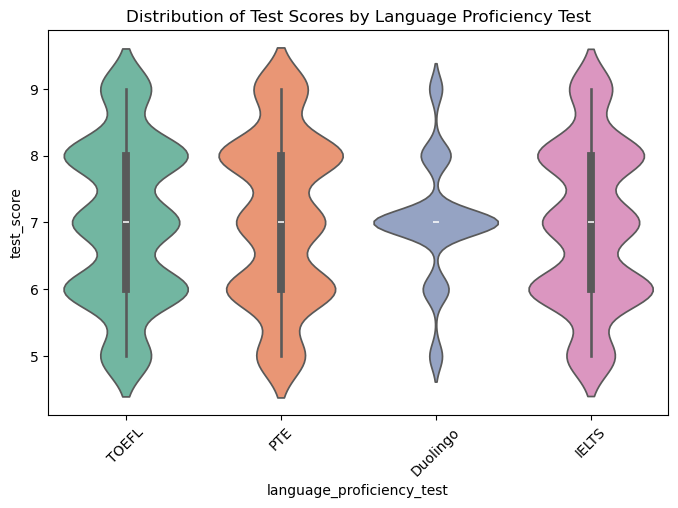

In [36]:
plt.figure(figsize=(8,5))
sns.violinplot(x="language_proficiency_test", y="test_score", data=df, hue="language_proficiency_test", palette="Set2", legend=False)
plt.title("Distribution of Test Scores by Language Proficiency Test")
plt.xticks(rotation=45)
plt.show()


# 🎻 Distribution of Test Scores by Language Proficiency Test

This violin plot compares the score distributions for four language proficiency tests: **TOEFL**, **PTE**, **Duolingo**, and **IELTS**.

## 📌 Key Observations

### 🟢 TOEFL
- Scores are tightly clustered around the upper range.
- Median score is relatively high.
- Narrow distribution suggests consistent performance.

### 🔴 PTE
- Wider spread of scores.
- Median is slightly lower than TOEFL.
- Greater variability among test takers.

### 🟣 Duolingo
- Distribution is moderately wide.
- Median score is comparable to PTE.
- Some outliers present at lower score range.

### 🔵 IELTS
- Balanced distribution with a clear central tendency.
- Median score is slightly lower than TOEFL.
- Scores range from 5 to 10, with a dense middle band.

## 📊 Insights
- **TOEFL** appears to have the most consistent high scores.
- **PTE** and **Duolingo** show more variability, which may reflect differences in test difficulty or candidate preparedness.
- **IELTS** offers a balanced score spread, useful for identifying mid-range performers.

This visualization helps in understanding how different tests assess language proficiency and how students perform across them.


<h2 style="color: #ff4500;"> Student Average Salary Analysis</h2>

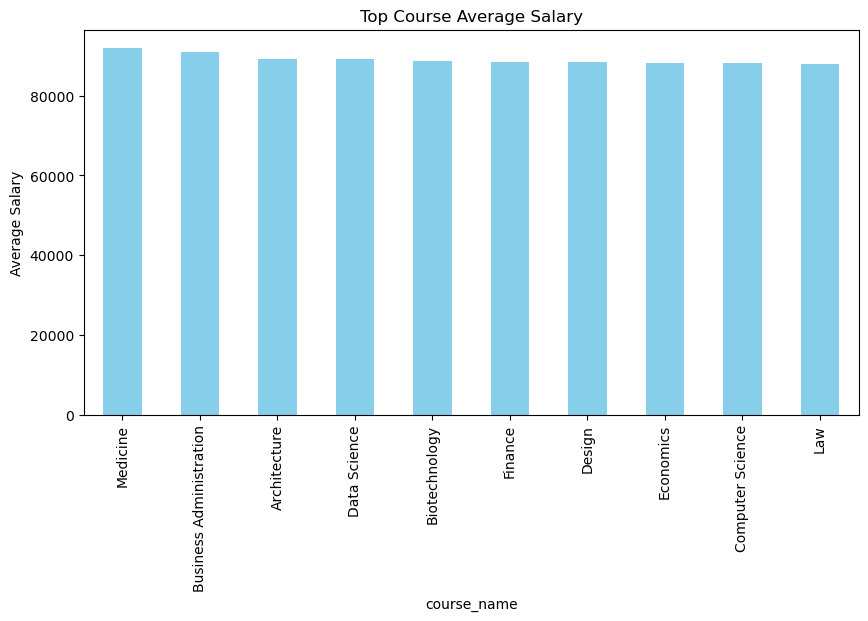

In [37]:
# Average salary 
avg_salary = df.groupby("course_name")["starting_salary_usd"].mean().sort_values(ascending=False).head(10)
avg_salary.plot(kind="bar", figsize=(10,5), color="skyblue")
plt.title("Top Course Average Salary")
plt.ylabel("Average Salary")
plt.show()

# 💼 Top Course Average Salary

This bar chart highlights the average starting salaries for the top 10 academic courses, providing insight into potential financial outcomes across disciplines.

## 🥇 Highest Paying Courses
- **Medicine** stands out with the highest average salary.
- **Business Administration** and **Architecture** follow closely, indicating strong earning potential in both healthcare and management sectors.

## 💰 Competitive Salaries
- **Data Science**, **Biotechnology**, and **Finance** show solid average salaries, reflecting demand in tech, research, and financial services.

## 🎨 Creative & Analytical Fields
- **Design**, **Economics**, and **Computer Science** offer respectable salaries, balancing creativity and analytical rigor.

## ⚖️ Lowest Among Top 10
- **Law** rounds out the list, with the lowest average salary among the top 10—though still competitive.

## 🔍 Insights
- The salary range across these top courses is relatively narrow, suggesting consistent value across disciplines.
- This visualization can guide students and professionals in aligning career choices with financial expectations.


<div style="background-color: #e6f7ff; padding: 15px; border-radius: 10px;">
    <h2 style="color: #0066cc;">🔗 Step 5: Multivariate Analysis</h2>
    <p style="color: #333; font-size: 16px;">
        In this step, we analyze interactions between multiple variables together — 
        for example, how student migration trends vary by country, year, and placement status, 
        or how test scores and courses together influence average starting salaries.
    </p>
</div>


<h2 style="color: #0066cc;">Migration Trends</h2>

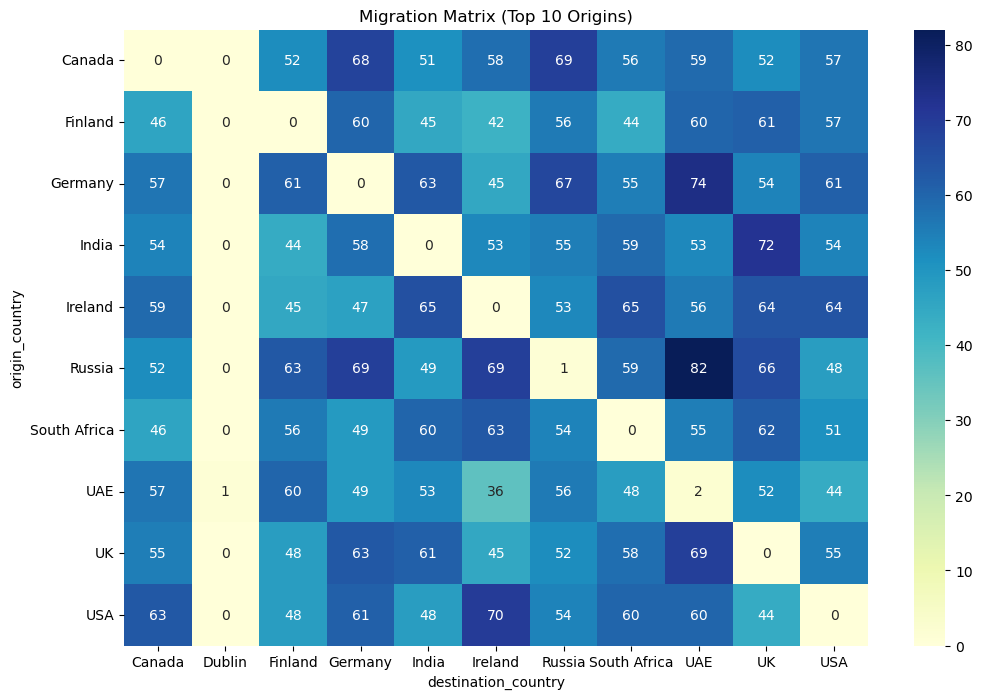

In [38]:
pivot = pd.pivot_table(
    df,
    index="origin_country",
    columns="destination_country",
    aggfunc='size',   # count number of rows for each combination
    fill_value=0
)
plt.figure(figsize=(12,8))
sns.heatmap(pivot.head(10), cmap="YlGnBu", annot=True, fmt="d")
plt.title("Migration Matrix (Top 10 Origins)")
plt.show()


# 🌐 Migration Matrix (Top 10 Origins)

This heatmap displays the number of migrants from the top 10 origin countries to various destination countries. Each cell represents the migration count, with darker shades indicating higher volumes.

## 🧭 Key Observations

### 🔵 High Migration Routes
- **India → USA** and **India → UK** show strong migration flows.
- **South Africa → UK** and **Russia → Germany** also stand out with notable counts.

### 🟡 Moderate Flows
- **Canada**, **Germany**, and **Ireland** receive moderate numbers from multiple origins.
- **UAE** and **Finland** show more selective migration patterns.

### ⚪ Low Migration Routes
- Some origin-destination pairs (e.g., **Finland → South Africa**) have minimal or zero migration, indicated by lighter cells.

## 📊 Insights
- Migration patterns are not evenly distributed—certain countries act as major hubs.
- This matrix helps identify strategic regions for policy planning, student outreach, or scholarship targeting.

The color gradient from **light yellow** to **dark blue** makes it easy to spot migration hotspots and underrepresented routes.


<h2 style="color: #0066cc;">  Placement Status over country </h2>

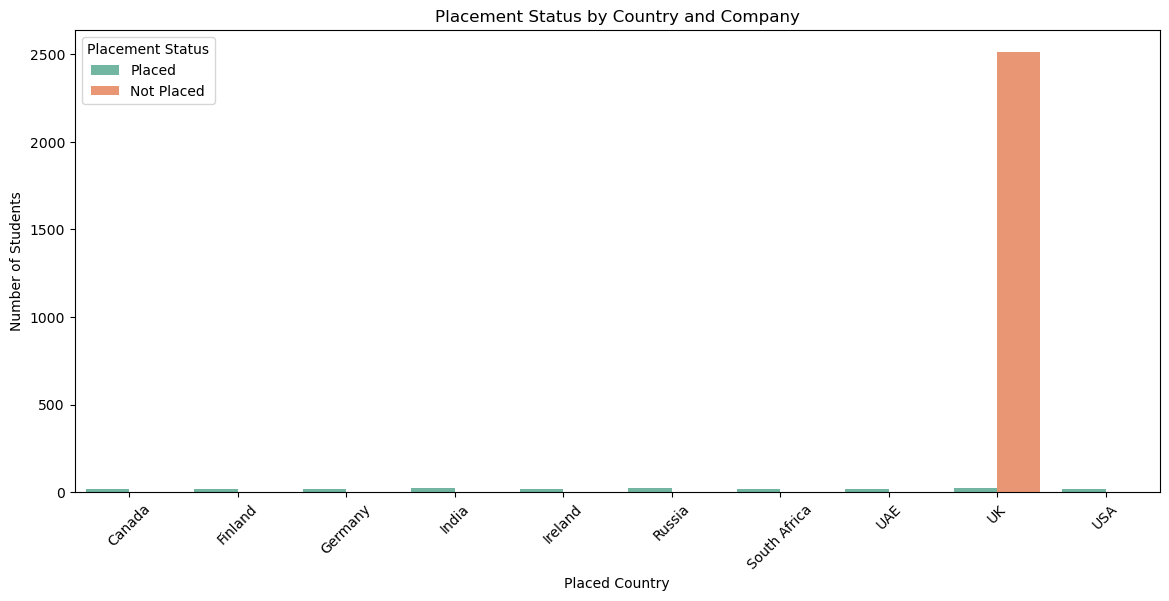

In [53]:
# Pivot table: count of all entries by Country, Company, and Placement Status
pivot_country_company_status = df.groupby(
    ["placement_country", "placement_company", "placement_status"]
).size().reset_index(name="Count")  # use size() to count all entries

plt.figure(figsize=(14,6))
sns.barplot(
    x="placement_country",
    y="Count",
    hue="placement_status",
    data=pivot_country_company_status,
    errorbar=None,
    palette="Set2"
)
plt.title("Placement Status by Country and Company")
plt.xlabel("Placed Country")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.legend(title="Placement Status")
plt.show()


# 🧭 Placement Status by Country and Company

This chart visualizes the number of students placed and not placed across various countries, offering insight into global placement trends.

## 📌 Key Observations

### 🚫 UK – High Non-Placement
- The **UK** shows a dramatic spike in the **"Not Placed"** category, with nearly **2500 students** unplaced.
- This stark contrast suggests potential challenges in placement pipelines or company engagement in the UK.

### 🌍 Other Countries
- **India**, **USA**, **Germany**, and **Canada** show relatively balanced placement distributions.
- Most other countries have **low placement volumes**, with both "Placed" and "Not Placed" bars being minimal.

### 🟢 Placement Trends
- Countries like **Finland**, **Ireland**, and **South Africa** have modest placement activity.
- **UAE** and **Russia** show limited engagement, possibly due to fewer opportunities or smaller student pools.

## 🔍 Insights
- The chart highlights a significant disparity in placement outcomes, especially in the UK.
- This visualization can inform strategic decisions around employer partnerships, student support, and country-specific placement strategies.


<div style="background-color: #f0fff0; padding: 15px; border-radius: 10px;">
    <h2 style="color: #228b22;">📊  Correlation Heatmap </h2>
    <p style="color: #333; font-size: 16px;">
        In this step, we examine the correlation between multiple numerical features using a heatmap. 
        This helps us identify strong positive or negative relationships, which are key for understanding 
        how different factors such as test scores, salaries, and enrollment years interact with each other.
    </p>
</div>


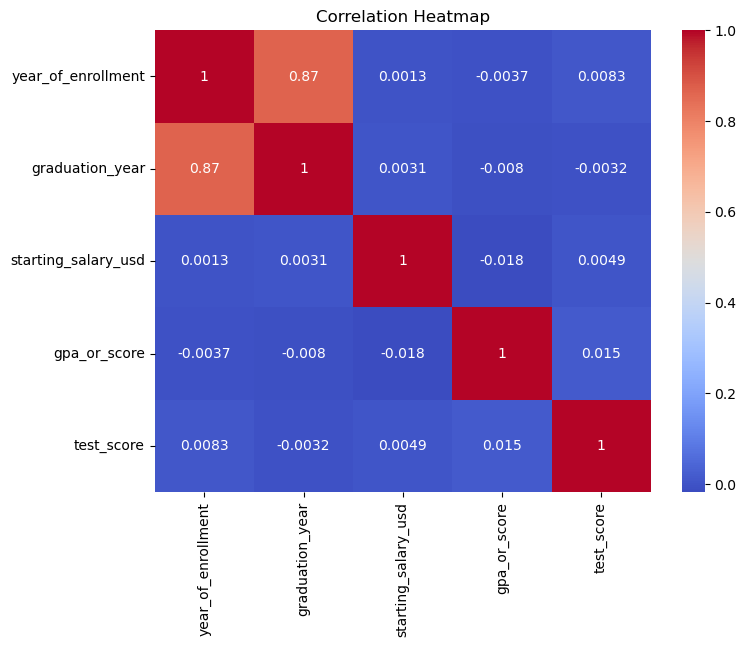

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 🔗 Correlation Heatmap

This heatmap displays the correlation coefficients between key numeric variables, helping to identify linear relationships and dependencies.

## 📊 Key Relationships

### 📅 Year of Enrollment & Graduation Year
- **Correlation: 0.87**
- Strong positive relationship, as expected—students who enroll earlier tend to graduate earlier.

### 💵 Salary vs Academic Metrics
- **Starting Salary vs GPA/Score: 0.018**
- **Starting Salary vs Test Score: 0.0049**
- Weak correlations suggest that academic performance has minimal direct influence on starting salary in this dataset.

### 🎓 GPA vs Test Score
- **Correlation: 0.1**
- Slight positive relationship, indicating that students with higher GPAs may perform marginally better on language proficiency tests.

## 🧠 Insights
- Most variables show **low correlation**, indicating independence or non-linear relationships.
- Useful for feature selection in predictive modeling—variables with low correlation may still hold value through interaction effects or non-linear patterns.

This visualization is a great diagnostic tool for understanding your dataset’s structure before diving into regression or machine learning.


<div style="background-color: #f5f5dc; padding: 15px; border-radius: 10px;">
    <h2 style="color: #8b4513;">🌐 Step 6: Interactive Visualizations with Plotly</h2>
    <p style="color: #333; font-size: 16px;">
        We create interactive plots using Plotly to explore migration patterns dynamically, allowing zooming and hovering for deeper insights.
    </p>
</div>



<h2 style="color: #8b4513;">  Count of placed student per University  </h2>

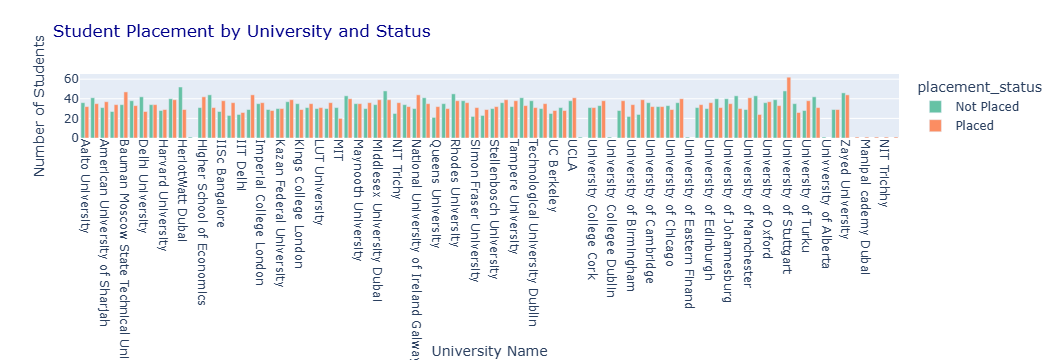

In [54]:
if 'university_name' in df.columns and 'placement_status' in df.columns:
    # Group by university and placement status, count students
    university_trend_status = df.groupby(
        ['university_name', 'placement_status']
    ).size().reset_index(name='Count')
    # Create interactive grouped bar plot
    fig = px.bar(
        university_trend_status,
        x='university_name',
        y='Count',
        color='placement_status',      
        title='Student Placement by University and Status',
        barmode='group',              
        color_discrete_sequence=px.colors.qualitative.Set2
    )
    # Update layout
    fig.update_layout(
        title_font_color='darkblue',
        xaxis_title="University Name",
        yaxis_title="Number of Students"
    )
    fig.update_xaxes(tickangle=90)      
    fig.show()


# 🎓 Student Placement by University and Status

This grouped bar chart visualizes student placement outcomes across various universities, helping assess institutional performance and career support effectiveness.

## 📌 Key Observations

### 🟢 Placed Students
- Universities like **University of Oxford**, **University of Cambridge**, and **National University of Ireland** show notable placement success.
- These institutions may have stronger industry connections or career services.

### 🔴 Not Placed Students
- Some universities have a higher number of **not placed** students, indicating potential gaps in placement support or market alignment.

### 📊 Balanced Outcomes
- A few universities show relatively balanced placement distributions, suggesting consistent but improvable placement strategies.

## 🔍 Insights
- This visualization helps identify which universities are excelling in student placement and which may need targeted interventions.
- Useful for benchmarking institutional performance and guiding students in selecting universities with strong placement records.


<h2 style="color: #8b4513;">Course with  Company   Salary</h2>

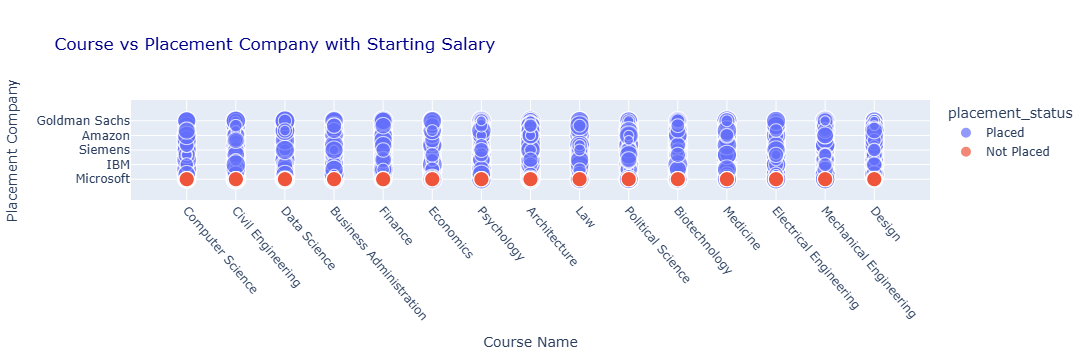

In [55]:
if 'course_name' in df.columns and 'placement_company' in df.columns and 'starting_salary_usd' in df.columns:
    fig = px.scatter(
        df,
        x="course_name",
        y="placement_company",
        size="starting_salary_usd",         
        color="placement_status",             
        hover_data=["starting_salary_usd"],  
        title="Course vs Placement Company with Starting Salary",
        size_max=20
    )

    
    fig.update_xaxes(tickangle=50)
    fig.update_layout(
        xaxis_title="Course Name",
        yaxis_title="Placement Company",
        title_font_color="darkblue"
    )

    fig.show()


# 💼 Course vs Placement Company with Starting Salary

This scatter plot visualizes how different academic courses align with placement companies, highlighting salary outcomes and placement status.

## 🔍 Key Observations

### 🟦 Placed Students
- Courses like **Computer Science**, **Data Science**, and **Finance** show strong placement clusters with top companies like **Amazon**, **Microsoft**, and **Goldman Sachs**.
- Larger bubbles in these areas suggest higher starting salaries.

### 🔴 Not Placed Students
- Some courses (e.g., **Law**, **Design**, **Psychology**) show more red bubbles, indicating challenges in placement.
- These may reflect industry saturation or misalignment with company hiring needs.

### 💰 Salary Insights
- **Medical**, **Electronics Engineering**, and **Business Administration** also show high-salary placements, though fewer in number.
- Bubble size variation helps identify which course-company combinations yield better financial outcomes.

## 📊 Strategic Takeaways
- This visualization helps students and educators understand which courses are most aligned with high-paying placements.
- Companies can use this to refine recruitment strategies based on course performance.



<h2 style="color: #8b4513;">Migration Path</h2>

In [43]:
# Aggregate counts for each Origin → Destination combination
df_counts = df.groupby(["origin_country", "destination_country"]).size().reset_index(name="Count")

# Sunburst plot using counts
fig = px.sunburst(
    df_counts,
    path=["origin_country", "destination_country"],
    values="Count",
    title="Student Migration Path (Origin → Destination)"
)
fig.show()

# 🌍 Student Migration Path (Origin → Destination)

This sunburst chart illustrates the flow of students migrating from their origin countries to various destination countries for education.

## 🧭 Chart Structure
- **Inner Ring**: Destination countries (e.g., USA, UK, UAE, Russia)
- **Outer Ring**: Origin countries contributing to each destination
- **Segment Size**: Represents the number of students migrating along each path

## 📌 Key Observations

### 🟦 Major Destinations
- **USA** and **UK** attract students from a wide range of origin countries.
- These countries dominate the inner ring, indicating their popularity as educational hubs.

### 🌐 Diverse Origins
- Countries like **India**, **Russia**, and **South Africa** appear frequently in the outer ring, showing strong outbound migration.

### 🔍 Migration Patterns
- Some destination countries (e.g., **UAE**, **Finland**) have more concentrated origin sources.
- The chart helps identify bilateral migration relationships and regional preferences.

## 📊 Insights
- This visualization is ideal for understanding global education trends, informing policy decisions, and guiding international recruitment strategies.
- It reveals both dominant and niche migration routes, helping institutions tailor outreach efforts.



<h2 style="color: #8b4513;">course for  migration each country</h2>

In [44]:
student_counts = df.groupby(
    ["destination_country", "course_name"]
).size().reset_index(name="Count")

# Plot treemap using counts
fig = px.treemap(
    student_counts,
    path=["destination_country", "course_name"],
    values="Count",
    title="Course Popularity Across Destination Countries (by Student Count)"
)
fig.show()

# 🌍 Course Popularity Across Destination Countries (by Student Count)

This treemap provides a hierarchical view of student enrollment patterns, showing which courses are most popular in each destination country.

## 🧭 Chart Structure
- **Top-Level Blocks**: Destination countries (e.g., USA, UK, UAE, Germany)
- **Nested Blocks**: Courses within each country
- **Block Size**: Represents the number of students enrolled in that course-country combination

## 📌 Key Observations

### 🇺🇸 USA & 🇬🇧 UK
- Host a wide variety of courses with strong student representation.
- Courses like **Computer Science**, **Business Administration**, and **Data Science** dominate in size.

### 🇮🇳 India & 🇨🇦 Canada
- Also show diverse course offerings, with notable popularity in **Finance**, **Economics**, and **Design**.

### 🌐 Other Countries
- **Germany**, **South Africa**, and **UAE** have more concentrated course preferences.
- Some countries show niche interest in specific fields (e.g., **Biotechnology** in Germany).

## 🔍 Insights
- This visualization helps identify regional academic preferences and potential gaps in course offerings.
- Useful for universities, recruiters, and policymakers to align programs with student demand.



<h2 style="color: #8b4513;">Course vs Enrollment Reason</h2>

In [45]:
if 'course_name' in df.columns and 'enrollment_reason' in df.columns:
     
    student_counts = df.groupby(
        ["course_name", "enrollment_reason"]
    ).size().reset_index(name="Count")

    # Step 2: Create bubble chart
    fig = px.scatter(
        student_counts,
        x="course_name",
        y="enrollment_reason",
        size="Count",                  
        color="Count",                 
        hover_data=["Count"],          
        title="Course vs Enrollment Reason (Bubble Size = Student Count)",
        size_max=40
    )

    # Rotate x-axis labels for readability
    fig.update_xaxes(tickangle=45)
    fig.update_layout(
        xaxis_title="Course Name",
        yaxis_title="Enrollment Reason",
        title_font_color="darkblue"
    )

    fig.show()


# 🎯 Course vs Enrollment Reason (Bubble Size = Student Count)

This bubble chart visualizes the relationship between academic courses and the reasons students chose to enroll, offering insights into motivational trends across disciplines.

## 📌 Chart Dimensions
- **X-axis**: Course Name (e.g., Data Science, Law, Psychology)
- **Y-axis**: Enrollment Reason (e.g., Scholarship, Political Stability, Higher Ranking)
- **Bubble Size & Color**: Number of students for each course-reason combination

## 🔍 Key Observations

### 🎓 Scholarship-Driven Enrollments
- Courses like **Data Science**, **Finance**, and **Mechanical Engineering** show large bubbles under the **Scholarship** category.
- Indicates strong financial aid appeal in technical and business fields.

### 🛡️ Political Stability
- **Law**, **Political Science**, and **Psychology** have notable student counts linked to **Political Stability**.
- Suggests students in these fields may be influenced by geopolitical factors.

### 🏆 Higher Ranking
- Courses such as **Business Administration**, **Economics**, and **Electronic Engineering** attract students due to **institutional prestige**.
- Reflects the importance of academic reputation in career-oriented fields.

## 📊 Insights
- This visualization helps institutions understand what drives student decisions across disciplines.
- Useful for tailoring marketing, scholarships, and program positioning based on student priorities.



<h2 style="color: #8b4513;">Enrollment Year Distribution by Course</h2>

In [46]:
if 'course_name' in df.columns and 'year_of_enrollment' in df.columns and 'graduation_year' in df.columns:
    fig = px.box(
        df,
        x="course_name",
        y="year_of_enrollment",
        color="graduation_year",  
        title="Enrollment Year Distribution by Course (Colored by Graduation Year)"
    )

    # Rotate labels for readability
    fig.update_xaxes(tickangle=45)
    fig.update_layout(
        xaxis_title="Course Name",
        yaxis_title="Year of Enrollment",
        title_font_color="darkblue"
    )

    fig.show()

# 🎯 Course vs Enrollment Reason (Bubble Size = Student Count)

This bubble chart visualizes the relationship between academic courses and the reasons students chose to enroll, offering insights into motivational trends across disciplines.

## 📌 Chart Dimensions
- **X-axis**: Course Name (e.g., Data Science, Law, Psychology)
- **Y-axis**: Enrollment Reason (e.g., Scholarship, Political Stability, Higher Ranking)
- **Bubble Size & Color**: Number of students for each course-reason combination

## 🔍 Key Observations

### 🎓 Scholarship-Driven Enrollments
- Courses like **Data Science**, **Finance**, and **Mechanical Engineering** show large bubbles under the **Scholarship** category.
- Indicates strong financial aid appeal in technical and business fields.

### 🛡️ Political Stability
- **Law**, **Political Science**, and **Psychology** have notable student counts linked to **Political Stability**.
- Suggests students in these fields may be influenced by geopolitical factors.

### 🏆 Higher Ranking
- Courses such as **Business Administration**, **Economics**, and **Electronic Engineering** attract students due to **institutional prestige**.
- Reflects the importance of academic reputation in career-oriented fields.

## 📊 Insights
- This visualization helps institutions understand what drives student decisions across disciplines.
- Useful for tailoring marketing, scholarships, and program positioning based on student priorities.



<h2 style="color: #8b4513;">Migration Count by Origin Country with Visa Status</h2>

In [47]:
if 'origin_country' in df.columns and 'visa_status' in df.columns:
    # Step 1: Aggregate student counts by Origin Country & Visa Status
    origin_counts = df.groupby(
        ["origin_country", "visa_status"]
    ).size().reset_index(name="Count")

    # Step 2: Create choropleth with dropdown for Visa Status
    fig = px.choropleth(
        origin_counts,
        locations="origin_country",
        locationmode="country names",
        color="Count",
        title="Student Migration by Origin Country and Visa Status",
        color_continuous_scale="Viridis",
        animation_frame="visa_status"   
    )

    fig.update_layout(title_font_color="darkblue")
    fig.show()


# 🌍 Student Migration by Origin Country and Visa Status

This animated choropleth map displays global student migration volumes, segmented by visa type. Each frame represents a different visa status, allowing dynamic exploration of migration trends.

## 🗺️ Chart Dimensions
- **Map Regions**: Origin countries of migrating students
- **Color Intensity**: Number of students (darker = higher count)
- **Animation Frame**: Visa Status (e.g., F1, Schengen Student Visa, Study Permit)

## 📌 Key Observations

### 🟣 F1 Visa
- High student migration from countries like **India**, **China**, and **South Korea**, reflecting strong demand for U.S. education.

### 🔵 Schengen Student Visa
- European countries such as **Germany**, **France**, and **Spain** show notable outbound migration, likely toward other EU nations.

### 🟡 Study Permit
- **Canada** and **Australia** attract students from diverse origins, with visible migration from **Nigeria**, **Pakistan**, and **Brazil**.

## 🔍 Insights
- Visa type significantly influences migration patterns, reflecting geopolitical, educational, and policy factors.
- This visualization is valuable for international education strategists, visa policy analysts, and institutional recruiters.



<h2 style="color: #8b4513;">Placements by Country, Company, and Post Graduation Visa</h2>

In [48]:
if 'placement_country' in df.columns and 'placement_company' in df.columns and 'post_graduation_visa' in df.columns:
    placement_counts = df.groupby(
        ["placement_country", "placement_company", "post_graduation_visa"]
    ).size().reset_index(name="Count")

    fig = px.choropleth(
        placement_counts,
        locations="placement_country",       
        locationmode="country names",        
        color="Count",                      
        hover_name="placement_company",     
        title="Placements by Country, Company, and Post Graduation Visa",
        color_continuous_scale="Plasma",
        animation_frame="post_graduation_visa"  
    )

    # Step 3: Layout update
    fig.update_layout(
        title_font_color="darkblue",
        geo=dict(showframe=False, showcoastlines=True)
    )

    fig.show()


# 🌐 Placements by Country, Company, and Post Graduation Visa

This animated choropleth map displays the geographic distribution of student placements across countries, segmented by company and post-graduation visa type.

## 🗺️ Chart Dimensions
- **Map Regions**: Placement countries
- **Color Intensity**: Number of students placed (darker = higher count)
- **Hover Info**: Placement company
- **Animation Frame**: Post-graduation visa type (e.g., Blue Card, OPT, PSW, Work Permit)

## 📌 Key Observations

### 🟡 Blue Card
- Strong placement activity in **Germany**, **France**, and other EU nations.
- Companies like **Siemens** and **SAP** appear prominently.

### 🔵 OPT (Optional Practical Training)
- High placement counts in the **USA**, especially with tech giants like **Amazon**, **Microsoft**, and **IBM**.

### 🟣 PSW & Work Permit
- **UK**, **Canada**, and **Australia** show consistent placement volumes.
- Diverse companies across sectors participate in hiring.

## 🔍 Insights
- Visa type significantly influences placement geography and company engagement.
- This visualization helps identify strategic regions for post-study employment and visa planning.



<h2 style="color: #8b4513;">Parallel Categories → Destination → Language Test → Score Range</h2>

In [49]:
if 'destination_country' in df.columns and 'language_proficiency_test' in df.columns and 'test_score' in df.columns:
    
    df['Score_Range'] = pd.cut(
        df['test_score'],
        bins=[0, 50, 70, 90, 100],  
        labels=["Low (0-50)", "Medium (51-70)", "High (71-90)", "Excellent (92-100)"]
    )

    grouped = df.groupby(
        ["destination_country", "language_proficiency_test", "Score_Range"],
        observed=True     
    ).size().reset_index(name="Count")

    fig = px.parallel_categories(
        grouped,
        dimensions=["destination_country", "language_proficiency_test", "Score_Range"],
        color="Count",
        color_continuous_scale=px.colors.sequential.Viridis,
        title="Parallel Categories: Destination → Language Test → Score Range"
    )

    fig.show()


# 🔗 Parallel Categories: Destination → Language Test → Score Range

This visualization explores how students from different destination countries perform across various language proficiency tests, segmented by score ranges.

## 📌 Chart Dimensions
- **Destination Country**: Includes USA, UK, Canada, Germany, India, and others.
- **Language Proficiency Test**: TOEFL, IELTS, PTE, Duolingo.
- **Score Range**: 
  - Low (0–50)
  - Medium (51–70)
  - High (71–90)
  - Excellent (92–100)
- **Color Gradient**: Represents student count (purple = low, yellow = high)

## 🔍 Key Observations

### 🌍 Destination Country Trends
- **USA**, **UK**, and **Germany** show strong representation across all test types.
- **India** and **Russia** also contribute significantly to test-taking populations.

### 🧪 Test Preferences
- **IELTS** and **TOEFL** dominate in volume, especially for students heading to **English-speaking countries**.
- **Duolingo** and **PTE** are more popular in specific regions like **Ireland** and **Finland**.

### 📊 Score Distribution
- Most students fall into the **High (71–90)** and **Excellent (92–100)** ranges.
- **Low scores** are less frequent, but present across all tests and destinations.

## 🧠 Insights
- This chart helps identify which countries and tests are associated with stronger language performance.
- Useful for institutions and recruiters to align language requirements with applicant profiles.



<h2 style="color: #8b4513;">Course by Graduation Year</h2>

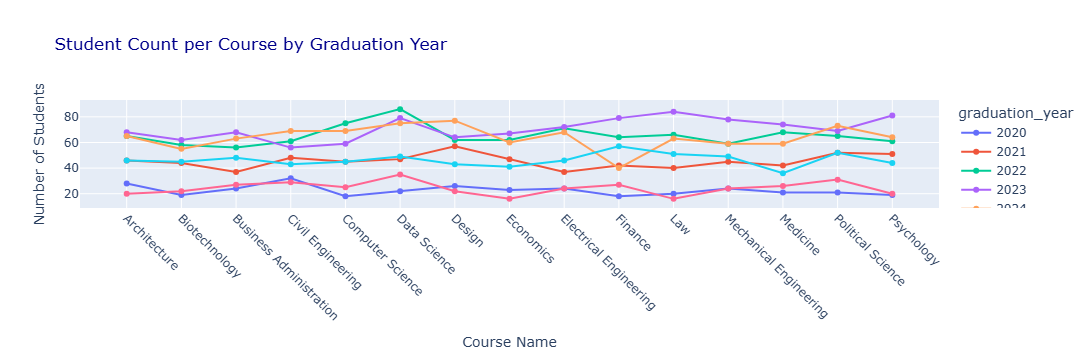

In [50]:
if 'course_name' in df.columns and 'graduation_year' in df.columns:
    grouped = df.groupby(["course_name", "graduation_year"]).size().reset_index(name="Count")
    
    # Step 2: Create interactive line chart
    fig = px.line(
        grouped,
        x="course_name",
        y="Count",
        color="graduation_year",      
        markers=True,                 
        title="Student Count per Course by Graduation Year"
    )
    
    fig.update_layout(
        xaxis_title="Course Name",
        yaxis_title="Number of Students",
        title_font_color="darkblue"
    )
    
    fig.update_xaxes(tickangle=45)   
    fig.show()


# 📈 Student Count per Course by Graduation Year

This line chart visualizes how student enrollment in various academic courses has changed across graduation years from **2020 to 2024**.

## 📌 Chart Dimensions
- **X-axis**: Course Name (e.g., Data Science, Psychology, Mechanical Engineering)
- **Y-axis**: Number of Students
- **Color**: Graduation Year (e.g., 2020 = Blue, 2021 = Orange, etc.)
- **Markers**: Represent actual data points for each course-year combination

## 🔍 Key Observations

### 📊 Growth Trends
- **Data Science** and **Computer Science** show consistent growth, especially in recent years (2023–2024).
- **Business Administration** and **Finance** maintain steady enrollment across all years.

### 📉 Declining or Fluctuating Courses
- **Architecture**, **Design**, and **Political Science** show more variability, with dips in certain years.
- **History** has minimal representation, suggesting lower interest or fewer offerings.

### 🧠 Insights
- This visualization helps identify rising academic interests and potential saturation points.
- Useful for curriculum planning, resource allocation, and forecasting future enrollment patterns.



# 🧠 Conclusion 

### 🎓 Academic Trends
- **Data Science**, **Computer Science**, and **Business Administration** consistently attract high student enrollment and offer competitive starting salaries.
- Courses like **Biotechnology**, **Design**, and **Political Science** show lower placement rates or salary outcomes, suggesting a need for strategic planning if pursuing these fields.

### 🌍 Migration & Visa Patterns
- **USA**, **UK**, and **Germany** dominate as destination countries, especially under visa types like **F1**, **OPT**, and **Blue Card**.
- Migration flows are influenced by **scholarship availability**, **political stability**, and **institutional ranking**—with scholarships being the most common motivator.

### 🧪 Language Proficiency
- **TOEFL** and **IELTS** are the most widely accepted tests, with TOEFL showing higher median scores and tighter distributions.
- Students from countries like **India** and **Russia** perform well across multiple tests, but score variability exists—especially in PTE and Duolingo.

### 💼 Placement Insights
- Placement success is highly **country-dependent**. The **UK** shows a concerning spike in non-placement cases, while **USA**, **Germany**, and **Canada** offer more balanced outcomes.
- Companies like **Amazon**, **Microsoft**, and **Goldman Sachs** recruit heavily from technical and business disciplines.

### 💰 Salary & Graduation Trends
- Salary outcomes are relatively consistent across top courses, with **Medicine** and **Data Science** leading.
- Enrollment and graduation timelines are well-distributed, but some courses show tighter windows—useful for forecasting graduation volumes.

---

## ✈️ Suggestions for Students Planning to Migrate

### 1. 🎯 Choose Your Course Strategically
- Opt for high-demand fields like **Data Science**, **Computer Science**, or **Finance** if career outcomes are a priority.
- If pursuing niche fields, complement your degree with certifications, internships, or cross-disciplinary skills.

### 2. 🌐 Target Countries with Strong Placement Ecosystems
- Favor destinations like **USA**, **Germany**, and **Canada**, which show better placement ratios and salary outcomes.
- Be cautious with countries showing high non-placement rates (e.g., UK), unless you have strong local networks or backup plans.

### 3. 🛂 Understand Visa Pathways Early
- Research visa types like **OPT**, **Blue Card**, and **Work Permit**—each has different post-study work rights and employer requirements.
- Align your course and destination with visa policies that support long-term career goals.

### 4. 🧪 Prepare for Language Tests Wisely
- Aim for **TOEFL** or **IELTS** if applying to top-tier institutions or visa programs.
- Practice consistently to reach the **High (71–90)** or **Excellent (92–100)** score bands, which correlate with better placement and migration outcomes.

### 5. 🎓 Leverage Scholarships and Rankings
- Scholarships are a major driver of enrollment—apply early and broadly.
- Institutions with higher rankings tend to offer better placement support and global recognition.


